Total Arbitrage Opportunities Found: 0
Total Potential Profit: 0.00


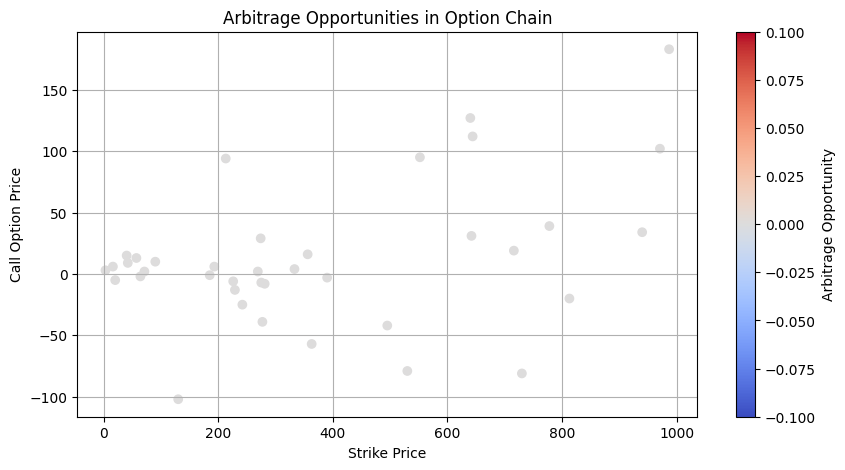

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('option-chain-ED-NIFTY-25-Jul-2024.csv')
data.rename(columns={'CALLS': 'CALLS_LTP', 'Unnamed: 1': 'STRIKE', 'PUTS': 'PUTS_LTP'}, inplace=True)
data.columns = data.columns.str.strip()
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

data.replace(',', '', regex=True, inplace=True)
numeric_columns = ['CALLS_LTP', 'PUTS_LTP', 'STRIKE']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

spot_price = 24141.95
risk_free_rate = 0.065
time_to_expiry = 24 / 365 

def calculate_theoretical_call(put_price, strike, spot, r, T):
    return put_price + spot - strike * np.exp(-r * T)

data['Theoretical_Call'] = data.apply(
    lambda row: calculate_theoretical_call(row['PUTS_LTP'], row['STRIKE'], spot_price, risk_free_rate, time_to_expiry),
    axis=1
)

data['Arbitrage_Opportunity'] = data['CALLS_LTP'] < data['Theoretical_Call']

arbitrage_opportunities = data[data['Arbitrage_Opportunity']]

arbitrage_opportunities['Potential_Profit'] = arbitrage_opportunities['Theoretical_Call'] - arbitrage_opportunities['CALLS_LTP']

total_opportunities = len(arbitrage_opportunities)
total_profit = arbitrage_opportunities['Potential_Profit'].sum()

print(f"Total Arbitrage Opportunities Found: {total_opportunities}")
print(f"Total Potential Profit: {total_profit:.2f}")

plt.figure(figsize=(10, 5))
plt.scatter(data['STRIKE'], data['CALLS_LTP'], c=data['Arbitrage_Opportunity'].astype(int), cmap='coolwarm', label='Arbitrage Opportunity')
plt.xlabel('Strike Price')
plt.ylabel('Call Option Price')
plt.title('Arbitrage Opportunities in Option Chain')
plt.colorbar(label='Arbitrage Opportunity')
plt.grid(True)
plt.show()

In [15]:
print(data.columns)

Index(['CALLS', 'Unnamed: 1', 'PUTS'], dtype='object')


In [11]:
data.rename(columns={'CALLS': 'CALLS_LTP', 'Unnamed: 1': 'STRIKE', 'PUTS': 'PUTS_LTP'}, inplace=True)


In [12]:
print(data.columns)

Index(['Unnamed: 0', 'OI', 'CHNG IN OI', 'VOLUME', 'IV', 'LTP', 'CHNG',
       'BID QTY', 'BID', 'ASK', 'ASK QTY', 'STRIKE', 'BID QTY.1', 'BID.1',
       'ASK.1', 'ASK QTY.1', 'CHNG.1', 'LTP.1', 'IV.1', 'VOLUME.1',
       'CHNG IN OI.1', 'OI.1', 'Unnamed: 22'],
      dtype='object')
